# Classification Origin

In [30]:
def assign_to_group(value, field_values, percentiles):
    # Convert the percentiles string to a list of integers
    percentiles = [int(p) for p in percentiles.split(',')]

    # Get the data values from the 'data' field in the feature
    data_values = field_values
    # Convert data values to floats
    data_values = [float(val) for val in data_values]

    # Calculate percentiles
    thresholds = np.percentile(data_values, percentiles)
    # Determine the group for the given value
    group = np.digitize(value, thresholds, right=True)

    return group


assign_to_group(100,[10,100,1000],'0,7,10,15')

4

In [1]:
import csv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import the colormap module
import folium
from scipy.spatial import Voronoi
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing



C:\Users\claud\AppData\Local\Temp\ipykernel_18368\3401648151.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


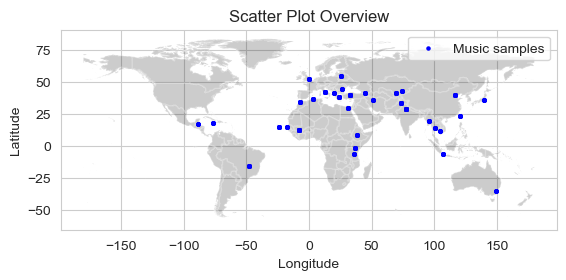

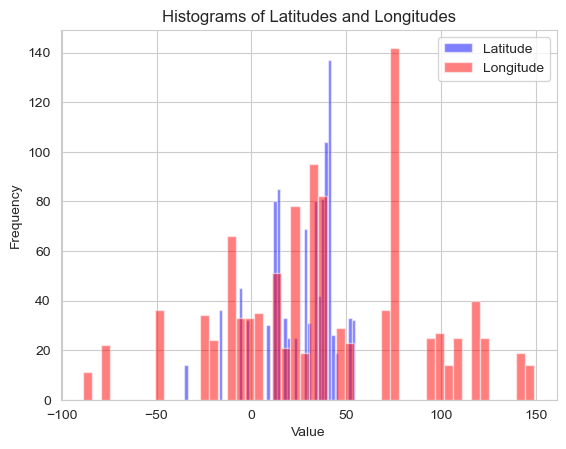

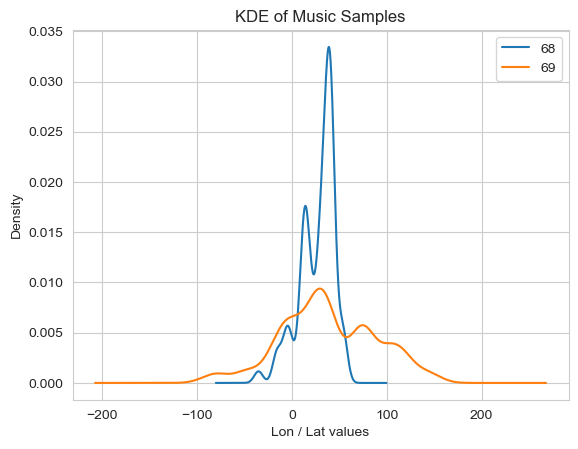

In [2]:
with open('./data/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))
gdf = gpd.read_file('./data/countries/world-administrative-boundaries.shp')

data = pd.DataFrame(data)
data[68] = data[68].astype(float) #latitude
data[69] = data[69].astype(float) #longitude

#calculate number of points per long/lat:

gdf.plot(ax=plt.gca(), color='black', alpha=0.2, label='Shapefile')
plt.scatter(data[69], data[68], s=5, color = "blue",label = 'Music samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot Overview')
plt.legend()
plt.show()


plt.hist(data[68], bins=50, alpha=0.5, color='blue', label='Latitude')
plt.hist(data[69], bins=50, alpha=0.5, color='red', label='Longitude')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histograms of Latitudes and Longitudes')
plt.show()


data.plot.kde()
plt.xlabel('Lon / Lat values')
plt.title('KDE of Music Samples')
plt.show()

In [3]:
per_lon = data.groupby(68).nunique().reset_index().sort_values(68)[[68,0]]
per_lon

,68,0
0,-35.30,14
1,-15.75,36
2,-6.17,45
3,-1.26,32
4,9.03,30
5,11.55,14
6,12.65,66
7,13.75,27
8,14.66,24
9,14.91,34


In [4]:
import pgeocode
import requests

data["country"] = None

for i in range(len(data)):
    print(f"{i}\t out of {len(data)}")
    latitude = str(data[68][i])
    longitude = str(data[69][i])
    text = requests.get(f"http://api.geonames.org/countryCode?lat={latitude}&lng={longitude}&username=clauwi").text.rstrip()
    if text == "ERR:15:no country code found":
        text = "NOVAL"
    data["country"][i] = text

0	 out of 1059
1	 out of 1059


C:\Users\claud\AppData\Local\Temp\ipykernel_18368\940756338.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["country"][i] = text


2	 out of 1059
3	 out of 1059
4	 out of 1059
5	 out of 1059
6	 out of 1059
7	 out of 1059
8	 out of 1059
9	 out of 1059
10	 out of 1059
11	 out of 1059
12	 out of 1059
13	 out of 1059
14	 out of 1059
15	 out of 1059
16	 out of 1059
17	 out of 1059
18	 out of 1059
19	 out of 1059
20	 out of 1059
21	 out of 1059
22	 out of 1059
23	 out of 1059
24	 out of 1059
25	 out of 1059
26	 out of 1059
27	 out of 1059
28	 out of 1059
29	 out of 1059
30	 out of 1059
31	 out of 1059
32	 out of 1059
33	 out of 1059
34	 out of 1059
35	 out of 1059
36	 out of 1059
37	 out of 1059
38	 out of 1059
39	 out of 1059
40	 out of 1059
41	 out of 1059
42	 out of 1059
43	 out of 1059
44	 out of 1059
45	 out of 1059
46	 out of 1059
47	 out of 1059
48	 out of 1059
49	 out of 1059
50	 out of 1059
51	 out of 1059
52	 out of 1059
53	 out of 1059
54	 out of 1059
55	 out of 1059
56	 out of 1059
57	 out of 1059
58	 out of 1059
59	 out of 1059
60	 out of 1059
61	 out of 1059
62	 out of 1059
63	 out of 1059
64	 out of 1059


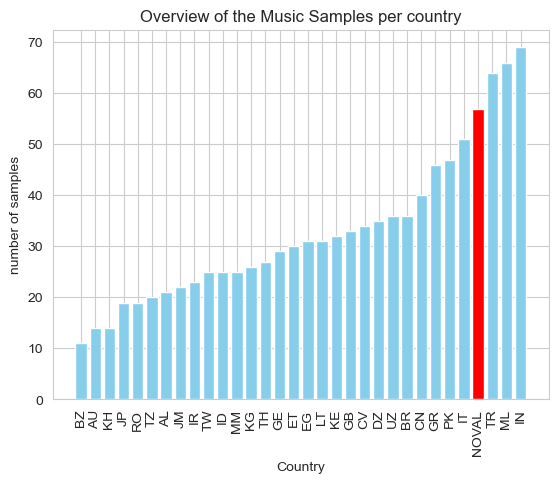

In [5]:
data2 = data[data['country'] != "ERR:19:the hourly limit of 1000 credits for clauwi has been exceeded. Please throttle your requests or use the commercial service."]
per_country = data2.groupby('country')[0].nunique().reset_index().sort_values(0)

plt.bar(per_country["country"],per_country[0], color = "skyblue")
plt.xticks(rotation='vertical')
plt.title("Overview of the Music Samples per country")
plt.ylabel("number of samples")
plt.xlabel("Country")
plt.bar(per_country[per_country["country"]=="NOVAL"]["country"],per_country[per_country["country"]=="NOVAL"][0], color = "red")
plt.show()

# PCA (if we want to use it)

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

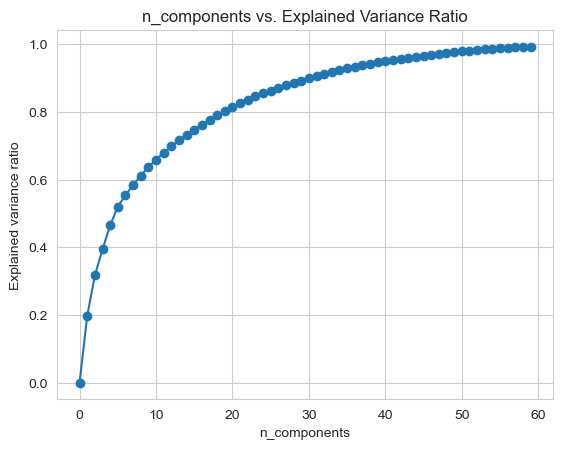

In [6]:
#make PCA:
data3 = data2.drop(['country',68,69],axis = 1)

scaler = preprocessing.StandardScaler()
data3_scaled = scaler.fit_transform(data3)

pca = PCA(n_components=10).fit(data3_scaled)
data3_pca = pca.transform(data3_scaled)

nums = np.arange(60)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(data3_scaled)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')


In [8]:
from sklearn.model_selection import train_test_split
from datetime import datetime, timezone
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import catboost as cb

start_time = datetime.now()



X_train, X_test, y_train, y_test = train_test_split(data3, data2['country'], test_size=0.2)




param_grid = {
    'iterations': [100],
    'depth': [6],
    'learning_rate': [0.1]
}
#define the scorer, in this case we can use the mean squared error:
scorer = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': make_scorer(r2_score)

}#initialize the model:
rfc = cb.CatBoostClassifier()

#make the GridSearch:

grid_search = GridSearchCV(
    estimator=rfc, #implement the GradienBoostingClassifier
    param_grid=param_grid, #the defined parameters (see above)
    scoring=scorer,
    cv=5, #5-fold Cross Validation -> quite normal here!
    n_jobs=-1, #use 1 core of the CPU,
    refit='mse',
    verbose=10,#print progress messages
)
#fit it to the train-set: if False, the fitted model will be loaded from disk:

grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\Anaconda3\envs\Zonal_Generatuor_new\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


0:	learn: 3.4070155	total: 619ms	remaining: 1m 1s
1:	learn: 3.3457571	total: 1.02s	remaining: 50.2s
2:	learn: 3.2845526	total: 1.48s	remaining: 47.8s
3:	learn: 3.2275684	total: 1.86s	remaining: 44.7s
4:	learn: 3.1840985	total: 2.19s	remaining: 41.7s
5:	learn: 3.1448108	total: 2.52s	remaining: 39.5s
6:	learn: 3.0907959	total: 2.82s	remaining: 37.5s
7:	learn: 3.0449446	total: 3.12s	remaining: 35.9s
8:	learn: 2.9993492	total: 3.43s	remaining: 34.7s
9:	learn: 2.9524002	total: 3.75s	remaining: 33.7s
10:	learn: 2.9112044	total: 4.06s	remaining: 32.9s
11:	learn: 2.8634984	total: 4.34s	remaining: 31.8s
12:	learn: 2.8187376	total: 4.64s	remaining: 31.1s
13:	learn: 2.7766215	total: 4.93s	remaining: 30.3s
14:	learn: 2.7297442	total: 5.22s	remaining: 29.6s
15:	learn: 2.6968483	total: 5.5s	remaining: 28.9s
16:	learn: 2.6495207	total: 5.79s	remaining: 28.3s
17:	learn: 2.6186133	total: 6.09s	remaining: 27.7s
18:	learn: 2.5797501	total: 6.37s	remaining: 27.1s
19:	learn: 2.5376053	total: 6.67s	remainin

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001D5064F9FD0>,
             n_jobs=-1,
             param_grid={'depth': [6], 'iterations': [100],
                         'learning_rate': [0.1]},
             refit='mse',
             scoring={'mae': make_scorer(mean_absolute_error, greater_is_better=False),
                      'mse': make_scorer(mean_squared_error, greater_is_better=False),
                      'r2': make_scorer(r2_score)},
             verbose=10)